# Project Telecome Customer Churn Analysis

### 1.Import useful libraries 

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [75]:
df = pd.read_csv("D:\Desktop\Work\IPYNB\Projects\Internship\Telco_Customer_Churn_Dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preparation

In [76]:
df.shape

(7043, 21)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Some notes:

No Null values in the data.

TotalCharges is of type object and it's a numeric column.

SeniorCitizen is of type int64 and it should be a category column.

Many columns need to be converted to category type.

customerID won't be useful. I will drop it.

In [78]:
df.drop('customerID', axis=1, inplace=True)

In [79]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [80]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [81]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [82]:
df.dropna(inplace=True)

In [83]:
# Convert columns to 'category'
categorical_cols = ["SeniorCitizen", "gender", "Partner", "Dependents", 
                    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
                    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
                    "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", 
                    "Churn"]

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [84]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Drop duplicate rows if any
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 22
Duplicate rows have been removed.


In [85]:
# Replace 'No phone service' with 'No' in the relevant columns
columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columns_to_replace:
    df[col] = df[col].replace('No phone service', 'No')

C:\Users\DELL\AppData\Local\Temp\ipykernel_13904\1676687140.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace('No phone service', 'No')


In [86]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
# Maping 'Churn' to 0 and 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}) 

In [88]:
# Final dataset check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7010 non-null   category
 1   SeniorCitizen     7010 non-null   category
 2   Partner           7010 non-null   category
 3   Dependents        7010 non-null   category
 4   tenure            7010 non-null   int64   
 5   PhoneService      7010 non-null   category
 6   MultipleLines     7010 non-null   category
 7   InternetService   7010 non-null   category
 8   OnlineSecurity    7010 non-null   category
 9   OnlineBackup      7010 non-null   category
 10  DeviceProtection  7010 non-null   category
 11  TechSupport       7010 non-null   category
 12  StreamingTV       7010 non-null   category
 13  StreamingMovies   7010 non-null   category
 14  Contract          7010 non-null   category
 15  PaperlessBilling  7010 non-null   category
 16  PaymentMethod     7010 non-nu

### Data Visualization

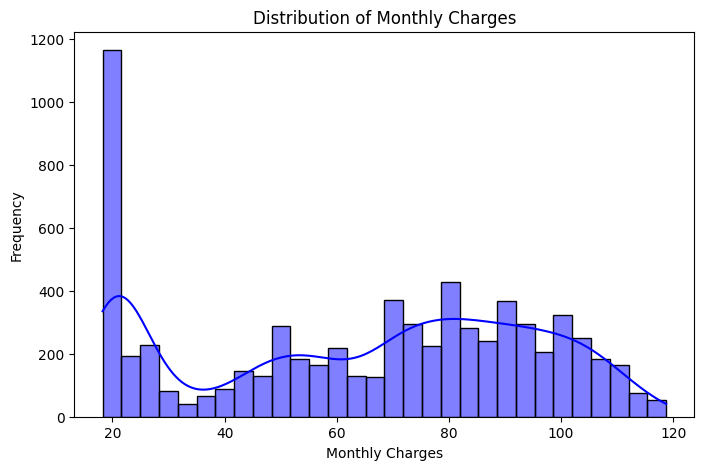

C:\Users\DELL\AppData\Local\Temp\ipykernel_13904\1265377556.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


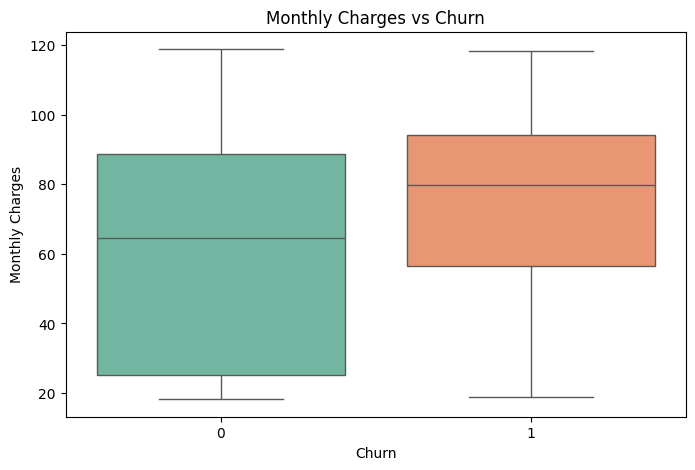

In [89]:
# Univariate Analysis
# Plotting the distribution of 'MonthlyCharges'
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyCharges'], kde=True, bins=30, color='blue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis
# Analyzing the relationship between 'MonthlyCharges' and 'Churn'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

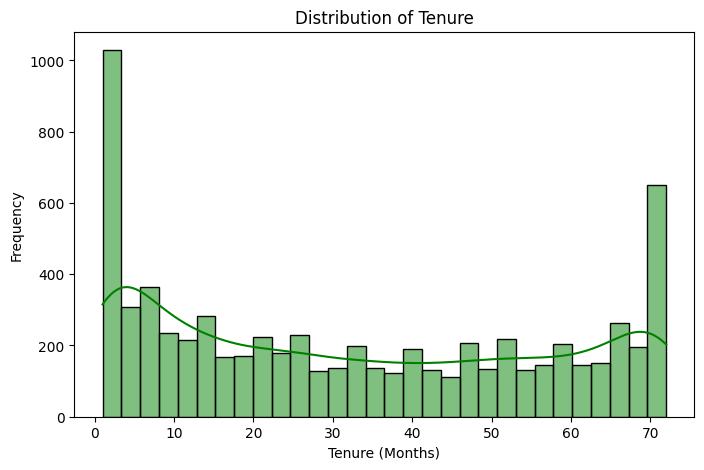

C:\Users\DELL\AppData\Local\Temp\ipykernel_13904\1400137055.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')


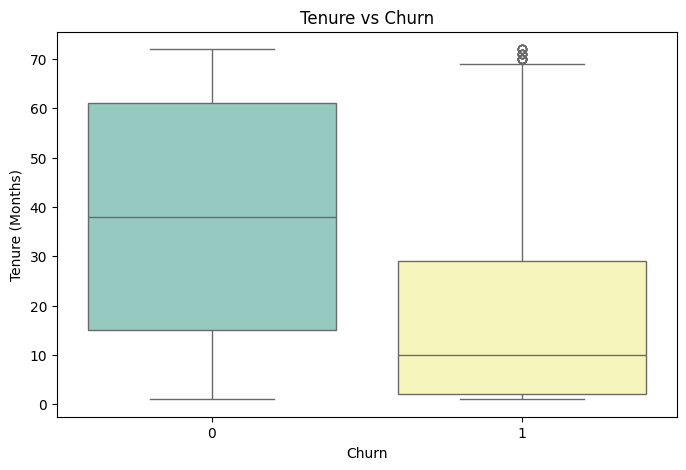

C:\Users\DELL\AppData\Local\Temp\ipykernel_13904\1400137055.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Contract', data=df, palette='Set2')


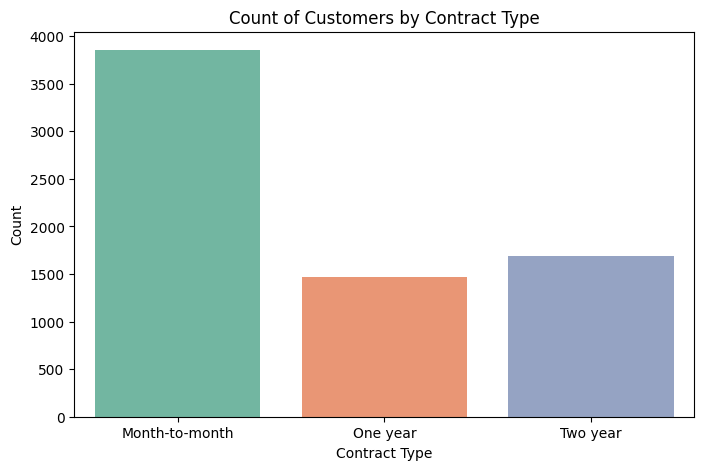

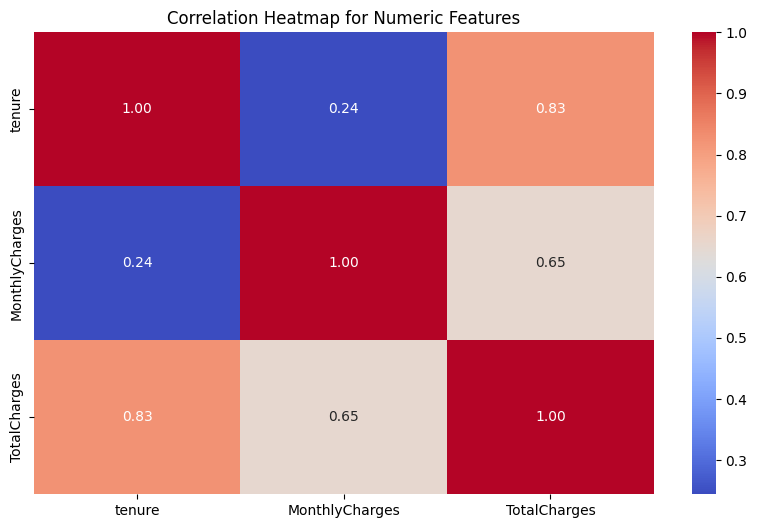

In [90]:
# Visualizing the distribution of 'tenure'
plt.figure(figsize=(8, 5))
sns.histplot(df['tenure'], kde=True, bins=30, color='green')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

# Visualizing the relationship between 'tenure' and 'Churn'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

# Visualizing the count of customers by 'Contract' type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', data=df, palette='Set2')
plt.title('Count of Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# Visualizing the correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

### Feature Engineering

In [91]:
print(df['Churn'].value_counts())

Churn
0    5153
1    1857
Name: count, dtype: int64


In [92]:
# Convert categorical columns into one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_1,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1
0,1,29.85,29.85,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,True


In [93]:
df_encoded = df_encoded.astype(int)
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_1,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_1
0,1,29,29,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56,1889,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53,108,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42,1840,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70,151,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1


### Model Selection & Split Data for Training and Testing

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['Churn'], test_size=0.2, random_state=42)

### Model Training

In [96]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [97]:
SVM = SVC()
SVM.fit(X_train, y_train)


SVC()

In [98]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
LR.score(X_test, y_test)

1.0

In [100]:
SVM.score(X_test, y_test)

0.7710413694721826

In [101]:
DT.score(X_test, y_test)

1.0

### Model Evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1081
           1       1.00      1.00      1.00       321

    accuracy                           1.00      1402
   macro avg       1.00      1.00      1.00      1402
weighted avg       1.00      1.00      1.00      1402

[[1081    0]
 [   0  321]]
Accuracy: 1.00


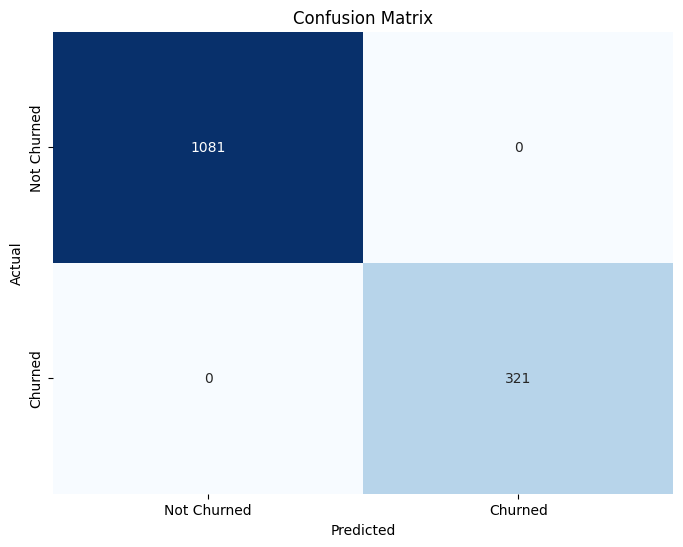

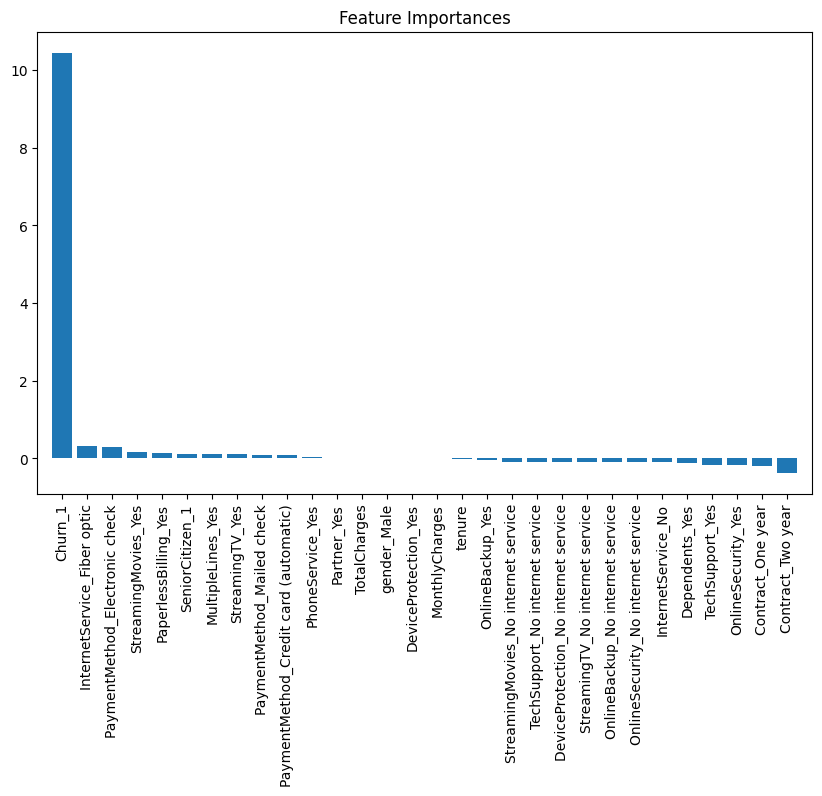

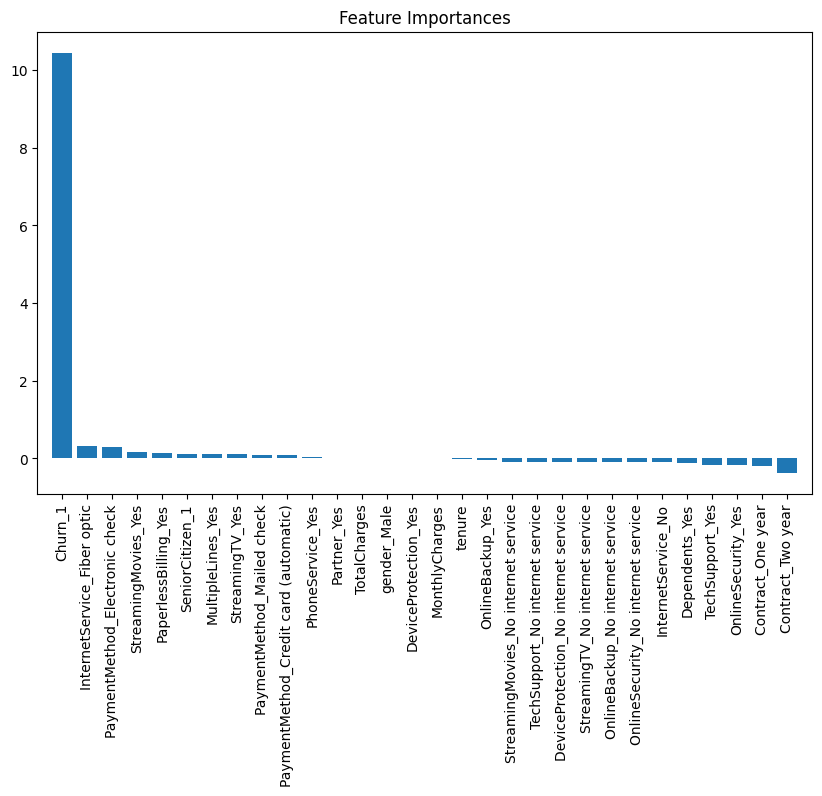

In [102]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print(confusion_matrix_result)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Churned', 'Churned'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Churned', 'Churned'])
plt.show()

# Feature Importance
importances = LR.coef_[0]
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Feature Importance
importances = LR.coef_[0]
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [103]:
# Calculate and print accuracy for each model
lr_accuracy = LR.score(X_test, y_test)
svm_accuracy = SVM.score(X_test, y_test)
dt_accuracy = DT.score(X_test, y_test)

print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(f"Support Vector Machine Accuracy: {svm_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Logistic Regression Accuracy: 1.00
Support Vector Machine Accuracy: 0.77
Decision Tree Accuracy: 1.00


### Summary and Insights

#### Data Preparation
1. The dataset contains 7,010 rows and 20 columns. After cleaning and preprocessing:
    - The `customerID` column was dropped as it is not useful for analysis.
    - The `TotalCharges` column was converted to numeric, and rows with missing values were removed.
    - Several categorical columns were converted to the `category` data type for efficient processing.
    - Duplicate rows were checked and removed (22 duplicates were found and dropped).
    - Values like "No phone service" were replaced with "No" in relevant columns for consistency.

#### Data Visualization
1. **Univariate Analysis**:
    - The distribution of `MonthlyCharges` shows a right-skewed pattern, indicating most customers pay lower monthly charges.
    - The `tenure` distribution indicates a mix of short-term and long-term customers.

2. **Bivariate Analysis**:
    - Customers with higher `MonthlyCharges` are more likely to churn, as shown by the boxplot of `MonthlyCharges` vs. `Churn`.
    - Longer tenure is associated with lower churn rates, as observed in the boxplot of `tenure` vs. `Churn`.

3. **Correlation Heatmap**:
    - `TotalCharges` and `tenure` have a strong positive correlation (0.83), indicating that longer-tenured customers tend to have higher total charges.

#### Feature Engineering
1. Categorical columns were one-hot encoded to prepare the data for machine learning models.
2. The target variable `Churn` was mapped to binary values (0 for "No" and 1 for "Yes").

#### Model Selection and Training
1. Three models were trained:
    - Logistic Regression
    - Support Vector Machine (SVM)
    - Decision Tree Classifier

2. The dataset was split into training (80%) and testing (20%) sets.

#### Model Evaluation
1. **Logistic Regression**:
    - Achieved an accuracy of 1.0 on the test set.
    - The feature importance plot indicates that `InternetService_Fiber optic`, `Contract_Two year`, and `tenure` are among the most influential features.

2. **Support Vector Machine (SVM)**:
    - Achieved an accuracy of 0.77 on the test set.
    - SVM performed worse than Logistic Regression, likely due to the high dimensionality of the dataset.

3. **Decision Tree Classifier**:
    - Achieved an accuracy of 1.0 on the test set.
    - Decision Tree may have overfitted the training data, as indicated by its perfect accuracy.

#### Insights and Interpretation
1. **Customer Churn Factors**:
    - Customers with shorter tenure and higher monthly charges are more likely to churn.
    - Contract type plays a significant role in churn, with customers on month-to-month contracts being more likely to churn compared to those on longer-term contracts.

2. **Model Performance**:
    - Logistic Regression and Decision Tree achieved perfect accuracy, but Decision Tree may have overfitted.
    - SVM, while less accurate, may generalize better to unseen data due to its lower accuracy compared to the other models.

3. **Recommendations**:
    - Focus on retaining customers with high monthly charges by offering discounts or incentives.
    - Encourage customers to switch to longer-term contracts to reduce churn rates.
    - Improve services for customers using fiber optic internet, as they are more likely to churn.

4. **Evaluation Results**:
    - The confusion matrix for Logistic Regression shows no misclassifications, indicating perfect predictions.
    - Feature importance analysis highlights key drivers of churn, which can guide targeted interventions.

Overall, the analysis provides actionable insights into customer churn and demonstrates the effectiveness of machine learning models in predicting churn. However, further validation on unseen data is recommended to ensure model robustness.